# WORK-IN-PROGRESS

Analysis is based on nifty50 index for the period from **19 Oct 2015 to 13 Oct 2017** taken from [here](https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm)

In [15]:
# Import necesary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import calendar

In [11]:
# Load in the data

data = pd.read_csv('./data/from-19-10-2015.csv', index_col=0, parse_dates=True)
data = data.append(pd.read_csv('data/from-14-10-2016.csv', index_col=0, parse_dates=True))
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2015-10-19,8262.55,8283.05,8239.20,8275.05,128300205,6880.43
2015-10-20,8280.30,8294.05,8229.20,8261.65,159947752,7661.53
2015-10-21,8258.35,8294.40,8217.15,8251.70,149270047,6689.35
2015-10-23,8308.25,8328.10,8280.75,8295.45,156664310,7466.28
2015-10-26,8333.65,8336.30,8252.05,8260.55,138006303,6799.49


In [12]:
# Create a new column with the day of the week
data['dayofweek'] = data.index.weekday_name
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),dayofweek
Date,,,,,,,
2015-10-19,8262.55,8283.05,8239.20,8275.05,128300205,6880.43,Monday
2015-10-20,8280.30,8294.05,8229.20,8261.65,159947752,7661.53,Tuesday
2015-10-21,8258.35,8294.40,8217.15,8251.70,149270047,6689.35,Wednesday
2015-10-23,8308.25,8328.10,8280.75,8295.45,156664310,7466.28,Friday
2015-10-26,8333.65,8336.30,8252.05,8260.55,138006303,6799.49,Monday


In [13]:
#Remove the entries for 2015 Nov 11 and 2016 Oct 30. They are muhurat trading days.
data = data[(data.index != '2015-11-11') & (data.index != '2016-10-30')]

In [14]:
#Add a column to record Returns
data['Range'] = data['High'] - data['Low']
data['Return'] = data['Open'] - data['Close']
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),dayofweek,Range,Return
Date,,,,,,,,,
2015-10-19,8262.55,8283.05,8239.20,8275.05,128300205,6880.43,Monday,43.85,-12.50
2015-10-20,8280.30,8294.05,8229.20,8261.65,159947752,7661.53,Tuesday,64.85,18.65
2015-10-21,8258.35,8294.40,8217.15,8251.70,149270047,6689.35,Wednesday,77.25,6.65
2015-10-23,8308.25,8328.10,8280.75,8295.45,156664310,7466.28,Friday,47.35,12.80
2015-10-26,8333.65,8336.30,8252.05,8260.55,138006303,6799.49,Monday,84.25,73.10


In [ ]:
data['index'] = [x for x in range(data.shape[0])]
data.set_index('index', inplace=True)

In [72]:
returns = dict()
for day in calendar.day_name[:-2]:
    returns[day] = (data[data.dayofweek == day].Return.values)

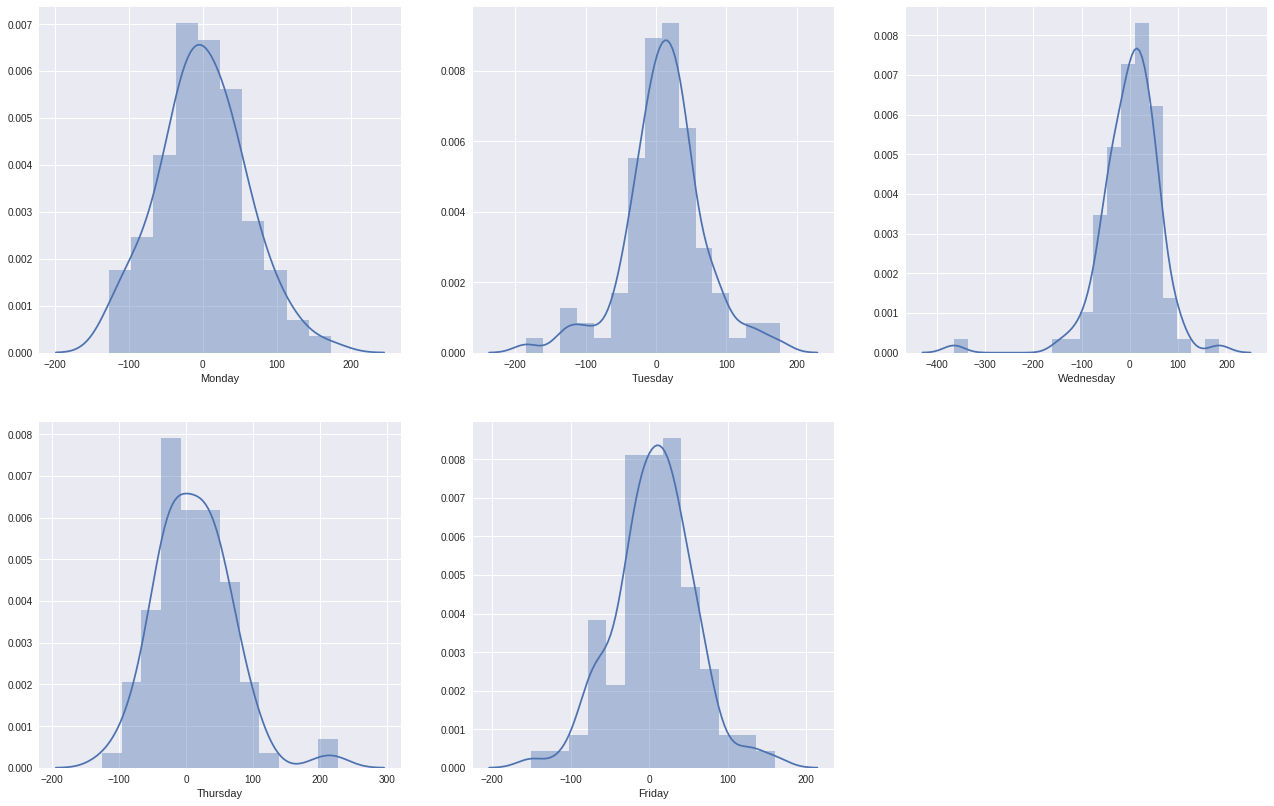

In [96]:
i = 0
plot = 231
plt.figure(figsize=(22,14))

while i < 5:
    day = calendar.day_name[i]
    plt.subplot(plot)
    sns.distplot(returns[day], axlabel=day)
    i = i + 1
    plot = plot + 1